In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
#import scipy
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from cmfrec import CMF
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
#from sklearn.model_selection import train_test_split
#from surprise.accuracy import rmse, mape
from surprise import accuracy

In [2]:
#import sys
#print(sys.executable)
#!pip install numpy


In [3]:
zee_users = pd.read_table("zee-users.dat",encoding = 'ISO-8859-1', sep="::", engine='python')
zee_ratings = pd.read_table("zee-ratings.dat",encoding = 'ISO-8859-1', sep="::", engine='python')
zee_movies = pd.read_table("zee-movies.dat", encoding = 'ISO-8859-1', sep="::", engine='python')

In [4]:
zee_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
zee_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
zee_movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
zee_movies.columns

Index(['Movie ID', 'Title', 'Genres'], dtype='object')

In [8]:
zee_movies.rename(columns = {"Movie ID": "MovieID"}, inplace = True)

In [9]:
type(zee_movies)

pandas.core.frame.DataFrame

In [10]:
type(zee_ratings)

pandas.core.frame.DataFrame

In [11]:
zee_users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [12]:
zee_ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [13]:
zee_movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [14]:
zee_ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [15]:
zee_movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [16]:
zee_users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [17]:
zee_users.UserID.nunique()

6040

In [18]:
zee_movies.dtypes

MovieID     int64
Title      object
Genres     object
dtype: object

In [19]:
zee_ratings.dtypes

UserID       int64
MovieID      int64
Rating       int64
Timestamp    int64
dtype: object

In [20]:
zee_users.dtypes

UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [21]:
zee_users.UserID.nunique()

6040

In [22]:
len(zee_users.UserID)

6040

In [23]:
len(zee_ratings.UserID)

1000209

In [24]:
zee_ratings.UserID.nunique()

6040

In [25]:
zee_ratings.UserID.value_counts()

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: count, Length: 6040, dtype: int64

In [26]:
len(zee_ratings.MovieID)

1000209

In [27]:
zee_ratings.MovieID.nunique()

3706

In [28]:
zee_ratings.MovieID.value_counts()

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: count, Length: 3706, dtype: int64

In [29]:
zee_ratings[zee_ratings.UserID == 2]

,UserID,MovieID,Rating,Timestamp
53,2,1357,5,978298709
54,2,3068,4,978299000
55,2,1537,4,978299620
56,2,647,3,978299351
57,2,2194,4,978299297
...,...,...,...,...
177,2,356,5,978299686
178,2,1245,2,978299200
179,2,1246,5,978299418
180,2,3893,1,978299535


In [30]:
zee_movies[zee_movies.MovieID == 1357]

,MovieID,Title,Genres
1336,1357,Shine (1996),Drama|Romance


In [31]:
zee_ratings.Rating.value_counts()

Rating
4    348971
3    261197
5    226310
2    107557
1     56174
Name: count, dtype: int64

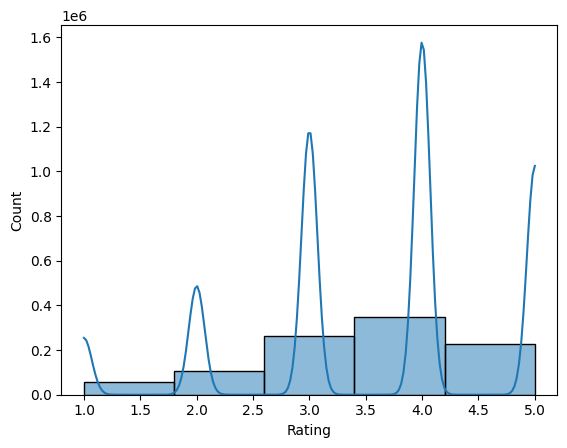

In [32]:

sns.histplot(zee_ratings.Rating, bins=5, kde=True)
plt.show()

In [33]:
zee_users.shape

(6040, 5)

In [34]:
zee_ratings.shape

(1000209, 4)

In [35]:
zee_movies.shape

(3883, 3)

In [36]:
zee_users.duplicated().sum()

0

In [37]:
zee_ratings.duplicated().sum()

0

In [38]:
zee_movies.duplicated().sum()

0

In [39]:
zee_users["Occupation"].nunique()

21

In [40]:
frequency_occupation = zee_users.groupby("Occupation")["UserID"].count()
frequency_occupation

Occupation
0     711
1     528
2     267
3     173
4     759
5     112
6     236
7     679
8      17
9      92
10    195
11    129
12    388
13    142
14    302
15    144
16    241
17    502
18     70
19     72
20    281
Name: UserID, dtype: int64

In [41]:
zee_users["Zip-code"].nunique()

3439

In [42]:
frequency_zipcode = zee_users.groupby("Zip-code")["UserID"].count()
frequency_zipcode

Zip-code
00231    1
00606    1
00681    1
00693    1
00918    1
        ..
99703    1
99709    1
99801    1
99826    1
99945    1
Name: UserID, Length: 3439, dtype: int64

we have to change timestamp format time stamp because its in unix format and is when users give rating to the movie 

In [43]:
zee_ratings['Formatted_Timestamp'] = zee_ratings["Timestamp"].apply(lambda ts : datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

In [44]:
zee_ratings['Formatted_Timestamp']

0          2000-12-31 22:12:40
1          2000-12-31 22:35:09
2          2000-12-31 22:32:48
3          2000-12-31 22:04:35
4          2001-01-06 23:38:11
                  ...         
1000204    2000-04-26 02:35:41
1000205    2000-04-25 23:21:27
1000206    2000-04-25 23:19:06
1000207    2000-04-26 02:20:48
1000208    2000-04-26 02:19:29
Name: Formatted_Timestamp, Length: 1000209, dtype: object

after we have merge rating and movie table

In [45]:
movies_ratings = zee_movies.merge(zee_ratings, on ="MovieID")

each use give min 20 movie ratinmg

In [46]:
movies_ratings

,MovieID,Title,Genres,UserID,Rating,Timestamp,Formatted_Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,2001-01-06 23:37:48
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,2000-12-31 04:30:08
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,2000-12-31 03:31:36
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,2000-12-31 01:25:52
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,2000-12-31 01:34:34
...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099,2001-06-09 07:34:59
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125,2001-04-02 14:52:05
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656,2002-01-24 20:04:16
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537,2001-01-18 21:15:37


In [47]:
movies_ratings.drop(columns = "Timestamp", inplace = True)

In [48]:
movies_ratings

,MovieID,Title,Genres,UserID,Rating,Formatted_Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:48
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,2000-12-31 04:30:08
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,2000-12-31 03:31:36
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,2000-12-31 01:25:52
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,2000-12-31 01:34:34
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,2001-06-09 07:34:59
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,2001-04-02 14:52:05
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,2002-01-24 20:04:16
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,2001-01-18 21:15:37


In [49]:
movies_ratings["Title"] = movies_ratings["Title"].astype(str)

split_values = movies_ratings["Title"].str.extract(r"^(.*?)\s*\((\d{4})\)$")
movies_ratings["Title"] = split_values[0].combine_first(movies_ratings["Title"]) 
movies_ratings["release_year"] = split_values[1].fillna("Unknown") 

movies_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Formatted_Timestamp,release_year
0,1,Toy Story,Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,1995
1,1,Toy Story,Animation|Children's|Comedy,6,4,2000-12-31 04:30:08,1995
2,1,Toy Story,Animation|Children's|Comedy,8,4,2000-12-31 03:31:36,1995
3,1,Toy Story,Animation|Children's|Comedy,9,5,2000-12-31 01:25:52,1995
4,1,Toy Story,Animation|Children's|Comedy,10,5,2000-12-31 01:34:34,1995


In [50]:
movies_ratings.isnull().sum()

MovieID                0
Title                  0
Genres                 0
UserID                 0
Rating                 0
Formatted_Timestamp    0
release_year           0
dtype: int64

In [51]:

movies_ratings["release_year"] = pd.to_numeric(movies_ratings["release_year"], errors='coerce')

movies_ratings["decade"] = (movies_ratings["release_year"] // 10 * 10).astype("Int64")
decade_counts = movies_ratings.groupby("decade")["MovieID"].count()

top_decade = decade_counts.idxmax()

print(f"The decade with the most movies is: {top_decade}s with {decade_counts[top_decade]} movies.")

decade_counts


The decade with the most movies is: 1990s with 532843 movies.


decade
1910        45
1920      1696
1930     12729
1940     21501
1950     35232
1960     48555
1970     82552
1980    224056
1990    532843
2000     41000
Name: MovieID, dtype: int64

In [52]:
movies_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Formatted_Timestamp,release_year,decade
0,1,Toy Story,Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,1995,1990
1,1,Toy Story,Animation|Children's|Comedy,6,4,2000-12-31 04:30:08,1995,1990
2,1,Toy Story,Animation|Children's|Comedy,8,4,2000-12-31 03:31:36,1995,1990
3,1,Toy Story,Animation|Children's|Comedy,9,5,2000-12-31 01:25:52,1995,1990
4,1,Toy Story,Animation|Children's|Comedy,10,5,2000-12-31 01:34:34,1995,1990


In [53]:
movies_df = movies_ratings.merge(zee_users, on ="UserID")

In [54]:
movies_df.head()

,MovieID,Title,Genres,UserID,Rating,Formatted_Timestamp,release_year,decade,Gender,Age,Occupation,Zip-code
0,1,Toy Story,Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,1995,1990,F,1,10,48067
1,1,Toy Story,Animation|Children's|Comedy,6,4,2000-12-31 04:30:08,1995,1990,F,50,9,55117
2,1,Toy Story,Animation|Children's|Comedy,8,4,2000-12-31 03:31:36,1995,1990,M,25,12,11413
3,1,Toy Story,Animation|Children's|Comedy,9,5,2000-12-31 01:25:52,1995,1990,M,25,17,61614
4,1,Toy Story,Animation|Children's|Comedy,10,5,2000-12-31 01:34:34,1995,1990,F,35,1,95370


In [55]:
occ_ana = movies_df.groupby("Occupation")["Rating"].count()
occ_ana.head()

Occupation
0    130499
1     85351
2     50068
3     31623
4    131032
Name: Rating, dtype: int64

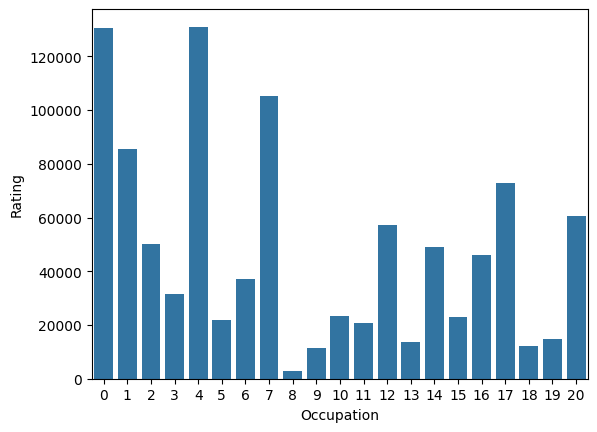

In [56]:
sns.barplot(data =occ_ana)
plt.autopct = "%.1f%%"
plt.show()

In [57]:
MOVIE_RAT  = movies_df.groupby("MovieID")["Rating"].count().idxmax()
MOVIE_RAT

top_rate = movies_df[movies_df["MovieID"] == MOVIE_RAT][["Title","MovieID"]]
top_rate

,Title,MovieID
766585,American Beauty,2858
766586,American Beauty,2858
766587,American Beauty,2858
766588,American Beauty,2858
766589,American Beauty,2858
...,...,...
770008,American Beauty,2858
770009,American Beauty,2858
770010,American Beauty,2858
770011,American Beauty,2858


In [58]:
gender_ana = movies_df.groupby("Gender")["Title"].count()
gender_ana.head()

Gender
F    246440
M    753769
Name: Title, dtype: int64

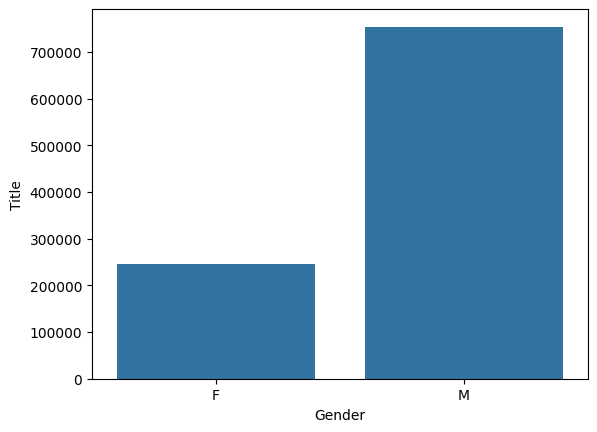

In [59]:
sns.barplot(data =gender_ana)
plt.autopct = "%.1f%%"
plt.show()

In [60]:
age_ana = movies_df.groupby("Age")["Title"].count()
age_ana

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
Name: Title, dtype: int64

In [61]:
movies_df.Age.unique()

array([ 1, 50, 25, 35, 18, 45, 56], dtype=int64)

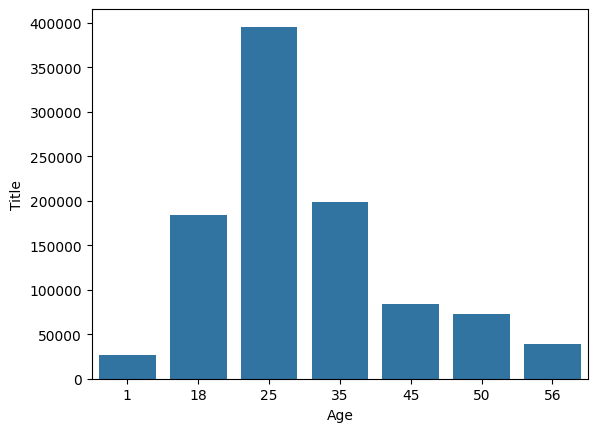

In [62]:
sns.barplot(data =age_ana)
plt.show()

In [63]:
movies_ratings.dtypes

MovieID                 int64
Title                  object
Genres                 object
UserID                  int64
Rating                  int64
Formatted_Timestamp    object
release_year            int64
decade                  Int64
dtype: object

In [64]:
movies_ratings["Formatted_Timestamp"]= pd.to_datetime(movies_ratings["Formatted_Timestamp"])
movies_ratings["rating_year"] = movies_ratings["Formatted_Timestamp"].dt.year
movies_ratings["rating_month"] = movies_ratings["Formatted_Timestamp"].dt.month

In [65]:
movies_ratings

,MovieID,Title,Genres,UserID,Rating,Formatted_Timestamp,release_year,decade,rating_year,rating_month
0,1,Toy Story,Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,1995,1990,2001,1
1,1,Toy Story,Animation|Children's|Comedy,6,4,2000-12-31 04:30:08,1995,1990,2000,12
2,1,Toy Story,Animation|Children's|Comedy,8,4,2000-12-31 03:31:36,1995,1990,2000,12
3,1,Toy Story,Animation|Children's|Comedy,9,5,2000-12-31 01:25:52,1995,1990,2000,12
4,1,Toy Story,Animation|Children's|Comedy,10,5,2000-12-31 01:34:34,1995,1990,2000,12
...,...,...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The",Drama|Thriller,5812,4,2001-06-09 07:34:59,2000,2000,2001,6
1000205,3952,"Contender, The",Drama|Thriller,5831,3,2001-04-02 14:52:05,2000,2000,2001,4
1000206,3952,"Contender, The",Drama|Thriller,5837,4,2002-01-24 20:04:16,2000,2000,2002,1
1000207,3952,"Contender, The",Drama|Thriller,5927,1,2001-01-18 21:15:37,2000,2000,2001,1


In [66]:
year_ana = movies_ratings.groupby("rating_year")["Title"].count()
year_ana.head()

rating_year
2000    904757
2001     68058
2002     24046
2003      3348
Name: Title, dtype: int64

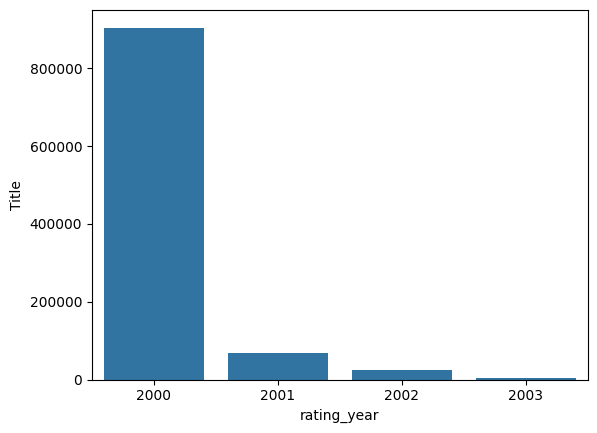

In [67]:
sns.barplot(data =year_ana)
plt.show()

In [68]:
ratin_sum = movies_ratings.groupby("Title")["Rating"].sum().reset_index()
ratin_sum.sort_values("Rating", ascending = False)

,Title,Rating
126,American Beauty,14800
3117,Star Wars: Episode IV - A New Hope,13321
3118,Star Wars: Episode V - The Empire Strikes Back,12836
3119,Star Wars: Episode VI - Return of the Jedi,11598
2860,Saving Private Ryan,11507
...,...,...
2098,"McCullochs, The",1
1028,Elstree Calling,1
1973,Lotto Land,1
1107,"Fantastic Night, The (La Nuit Fantastique)",1


In [69]:

ratin_sum.head()

,Title,Rating
0,"$1,000,000 Duck",112
1,'Night Mother,236
2,'Til There Was You,140
3,"'burbs, The",882
4,...And Justice for All,739


In [70]:
rating_counts= movies_ratings.groupby("Title").count()["Rating"].reset_index()
rating_counts.rename(columns={'Rating':"num_ratings"}, inplace = True)

In [71]:
rating_counts

,Title,num_ratings
0,"$1,000,000 Duck",37
1,'Night Mother,70
2,'Til There Was You,52
3,"'burbs, The",303
4,...And Justice for All,199
...,...,...
3659,"Zed & Two Noughts, A",29
3660,Zero Effect,301
3661,Zero Kelvin (Kjærlighetens kjøtere),2
3662,Zeus and Roxanne,23


In [72]:
rating_counts["num_ratings"].isnull().sum()

0

In [73]:
movies_ratings

,MovieID,Title,Genres,UserID,Rating,Formatted_Timestamp,release_year,decade,rating_year,rating_month
0,1,Toy Story,Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,1995,1990,2001,1
1,1,Toy Story,Animation|Children's|Comedy,6,4,2000-12-31 04:30:08,1995,1990,2000,12
2,1,Toy Story,Animation|Children's|Comedy,8,4,2000-12-31 03:31:36,1995,1990,2000,12
3,1,Toy Story,Animation|Children's|Comedy,9,5,2000-12-31 01:25:52,1995,1990,2000,12
4,1,Toy Story,Animation|Children's|Comedy,10,5,2000-12-31 01:34:34,1995,1990,2000,12
...,...,...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The",Drama|Thriller,5812,4,2001-06-09 07:34:59,2000,2000,2001,6
1000205,3952,"Contender, The",Drama|Thriller,5831,3,2001-04-02 14:52:05,2000,2000,2001,4
1000206,3952,"Contender, The",Drama|Thriller,5837,4,2002-01-24 20:04:16,2000,2000,2002,1
1000207,3952,"Contender, The",Drama|Thriller,5927,1,2001-01-18 21:15:37,2000,2000,2001,1


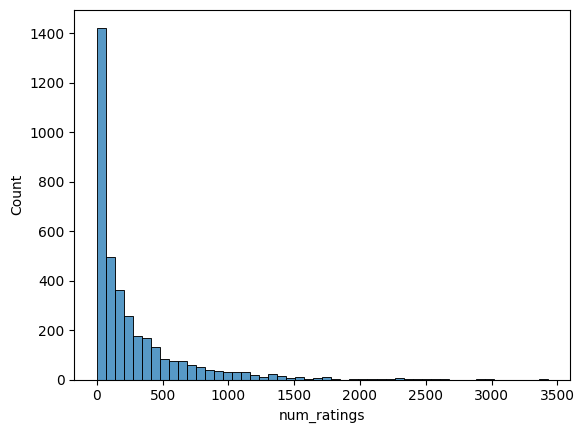

In [74]:
sns.histplot(rating_counts["num_ratings"], bins=50, kde=False)
plt.show()

In [75]:
Rating_Avg = movies_ratings.groupby("Title").mean(numeric_only = True)["Rating"].reset_index()
Rating_Avg.rename(columns = {"Rating":"Avg_Rating"}, inplace = True)

In [76]:
Rating_Avg

,Title,Avg_Rating
0,"$1,000,000 Duck",3.027027
1,'Night Mother,3.371429
2,'Til There Was You,2.692308
3,"'burbs, The",2.910891
4,...And Justice for All,3.713568
...,...,...
3659,"Zed & Two Noughts, A",3.413793
3660,Zero Effect,3.750831
3661,Zero Kelvin (Kjærlighetens kjøtere),3.500000
3662,Zeus and Roxanne,2.521739


In [77]:
cleared_df= Rating_Avg.merge(rating_counts, on = "Title")

In [78]:
cleared_df.head()

,Title,Avg_Rating,num_ratings
0,"$1,000,000 Duck",3.027027,37
1,'Night Mother,3.371429,70
2,'Til There Was You,2.692308,52
3,"'burbs, The",2.910891,303
4,...And Justice for All,3.713568,199


In [79]:
cleared_df[cleared_df["num_ratings"]>50].sort_values("Avg_Rating", ascending = False)

,Title,Avg_Rating,num_ratings
2849,Sanjuro,4.608696,69
2905,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510,628
2934,"Shawshank Redemption, The",4.554558,2227
1345,"Godfather, The",4.524966,2223
710,"Close Shave, A",4.520548,657
...,...,...,...
306,Battlefield Earth,1.611111,342
1694,Iron Eagle IV,1.603448,58
2631,Problem Child 2,1.555556,99
2104,Meatballs III,1.553846,65


In [80]:
len(cleared_df)

3664

In [81]:
len(movies_ratings.groupby("UserID").count())

6040

In [82]:
movies_ratings.MovieID.nunique()

3706

In [83]:
movies_ratings.UserID.nunique()

6040

In [84]:
x = movies_ratings.groupby("UserID")["MovieID"].count() > 75
regular_users = x[x].index

In [85]:
len(x)

6040

In [86]:
regular_users

Index([   2,    5,    8,    9,   10,   11,   13,   15,   17,   18,
       ...
       6024, 6025, 6026, 6030, 6032, 6035, 6036, 6037, 6039, 6040],
      dtype='int64', name='UserID', length=3462)

In [87]:
len(regular_users)

3462

In [88]:
filtered_ratings = movies_ratings[movies_ratings["UserID"].isin(regular_users)]

In [89]:
filtered_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Formatted_Timestamp,release_year,decade,rating_year,rating_month
2,1,Toy Story,Animation|Children's|Comedy,8,4,2000-12-31 03:31:36,1995,1990,2000,12
3,1,Toy Story,Animation|Children's|Comedy,9,5,2000-12-31 01:25:52,1995,1990,2000,12
4,1,Toy Story,Animation|Children's|Comedy,10,5,2000-12-31 01:34:34,1995,1990,2000,12
5,1,Toy Story,Animation|Children's|Comedy,18,4,2000-12-30 05:39:28,1995,1990,2000,12
6,1,Toy Story,Animation|Children's|Comedy,19,5,2001-01-03 21:06:34,1995,1990,2001,1


In [90]:
len(filtered_ratings)

892091

In [91]:
filtered_ratings

,MovieID,Title,Genres,UserID,Rating,Formatted_Timestamp,release_year,decade,rating_year,rating_month
2,1,Toy Story,Animation|Children's|Comedy,8,4,2000-12-31 03:31:36,1995,1990,2000,12
3,1,Toy Story,Animation|Children's|Comedy,9,5,2000-12-31 01:25:52,1995,1990,2000,12
4,1,Toy Story,Animation|Children's|Comedy,10,5,2000-12-31 01:34:34,1995,1990,2000,12
5,1,Toy Story,Animation|Children's|Comedy,18,4,2000-12-30 05:39:28,1995,1990,2000,12
6,1,Toy Story,Animation|Children's|Comedy,19,5,2001-01-03 21:06:34,1995,1990,2001,1
...,...,...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The",Drama|Thriller,5812,4,2001-06-09 07:34:59,2000,2000,2001,6
1000205,3952,"Contender, The",Drama|Thriller,5831,3,2001-04-02 14:52:05,2000,2000,2001,4
1000206,3952,"Contender, The",Drama|Thriller,5837,4,2002-01-24 20:04:16,2000,2000,2002,1
1000207,3952,"Contender, The",Drama|Thriller,5927,1,2001-01-18 21:15:37,2000,2000,2001,1


In [92]:
filtered_ratings.drop(columns = "Formatted_Timestamp", inplace = True)

C:\Users\PRAVEEN KUMAR.P\AppData\Local\Temp\ipykernel_15640\2841912297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ratings.drop(columns = "Formatted_Timestamp", inplace = True)


In [93]:
filtered_ratings

,MovieID,Title,Genres,UserID,Rating,release_year,decade,rating_year,rating_month
2,1,Toy Story,Animation|Children's|Comedy,8,4,1995,1990,2000,12
3,1,Toy Story,Animation|Children's|Comedy,9,5,1995,1990,2000,12
4,1,Toy Story,Animation|Children's|Comedy,10,5,1995,1990,2000,12
5,1,Toy Story,Animation|Children's|Comedy,18,4,1995,1990,2000,12
6,1,Toy Story,Animation|Children's|Comedy,19,5,1995,1990,2001,1
...,...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The",Drama|Thriller,5812,4,2000,2000,2001,6
1000205,3952,"Contender, The",Drama|Thriller,5831,3,2000,2000,2001,4
1000206,3952,"Contender, The",Drama|Thriller,5837,4,2000,2000,2002,1
1000207,3952,"Contender, The",Drama|Thriller,5927,1,2000,2000,2001,1


highest rating is 14500 so we have consider this threshold

In [94]:
y = filtered_ratings.groupby("Title").count()["Rating"]>=30
famous_movies = y[y].index

In [95]:
famous_movies

Index(['$1,000,000 Duck', ''Night Mother', ''Til There Was You', ''burbs, The',
       '...And Justice for All', '10 Things I Hate About You',
       '101 Dalmatians', '12 Angry Men', '13th Warrior, The', '187',
       ...
       'You've Got Mail', 'Young Doctors in Love', 'Young Frankenstein',
       'Young Guns', 'Young Guns II', 'Young Poisoner's Handbook, The',
       'Young Sherlock Holmes', 'Your Friends and Neighbors', 'Zero Effect',
       'eXistenZ'],
      dtype='object', name='Title', length=2759)

In [96]:
final_df =  filtered_ratings[filtered_ratings["Title"].isin(famous_movies)]

In [97]:
final_df

,MovieID,Title,Genres,UserID,Rating,release_year,decade,rating_year,rating_month
2,1,Toy Story,Animation|Children's|Comedy,8,4,1995,1990,2000,12
3,1,Toy Story,Animation|Children's|Comedy,9,5,1995,1990,2000,12
4,1,Toy Story,Animation|Children's|Comedy,10,5,1995,1990,2000,12
5,1,Toy Story,Animation|Children's|Comedy,18,4,1995,1990,2000,12
6,1,Toy Story,Animation|Children's|Comedy,19,5,1995,1990,2001,1
...,...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The",Drama|Thriller,5812,4,2000,2000,2001,6
1000205,3952,"Contender, The",Drama|Thriller,5831,3,2000,2000,2001,4
1000206,3952,"Contender, The",Drama|Thriller,5837,4,2000,2000,2002,1
1000207,3952,"Contender, The",Drama|Thriller,5927,1,2000,2000,2001,1


In [98]:
final_df["Genres"].nunique()

295

In [99]:
pt = final_df.pivot_table(columns = "UserID", index = "Title", values = "Rating")

In [100]:
pt.head()

UserID,2,5,8,9,10,11,13,15,17,18,...,6024,6025,6026,6030,6032,6035,6036,6037,6039,6040
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Night Mother,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
'Til There Was You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The",NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
pt = pt.fillna(0)

In [102]:
pt.head()

UserID,2,5,8,9,10,11,13,15,17,18,...,6024,6025,6026,6030,6032,6035,6036,6037,6039,6040
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Night Mother,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
'Til There Was You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The",0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
pearson_sim = pt.T.corr(method='pearson')

In [104]:
pearson_sim.head()

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",187,...,You've Got Mail,Young Doctors in Love,Young Frankenstein,Young Guns,Young Guns II,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Your Friends and Neighbors,Zero Effect,eXistenZ
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck",1.000000,0.066737,0.030256,0.062772,0.048855,0.034083,0.172493,0.073508,0.032035,0.022030,...,0.071963,0.110028,0.099947,0.033025,0.040559,0.026939,0.053665,0.031476,0.015464,0.001003
'Night Mother,0.066737,1.000000,0.114327,0.095423,0.150034,0.038863,0.100113,0.079965,0.002022,0.056112,...,0.041899,0.214119,0.080408,0.036503,0.002029,0.037562,0.055798,0.126473,0.045097,0.050168
'Til There Was You,0.030256,0.114327,1.000000,0.054216,0.026992,0.111683,0.097120,0.048695,0.014180,-0.012153,...,0.140003,0.063468,-0.006212,0.024232,0.022103,0.015295,0.035014,0.068552,0.056761,0.040179
"'burbs, The",0.062772,0.095423,0.054216,1.000000,0.084729,0.120552,0.176605,0.076732,0.122341,0.076493,...,0.141204,0.118449,0.130383,0.237563,0.180647,0.084312,0.149909,0.108560,0.103957,0.046123
...And Justice for All,0.048855,0.150034,0.026992,0.084729,1.000000,-0.001479,0.115798,0.137757,0.032359,0.116455,...,0.027806,0.116994,0.112352,0.056984,0.037436,0.068905,0.108274,0.088048,0.065081,0.067119


In [105]:
print(type(pearson_sim))

<class 'pandas.core.frame.DataFrame'>


In [106]:
pearson_sim.shape

(2759, 2759)

In [107]:
def recommend(movie):
    #if movie not in pt.index:
        #return f"Movie '{movie}' not found in database."
    index = np.where(pt.index == movie)[0][0]
    similar_movies = sorted(list(enumerate(pearson_sim.iloc[index])),key = lambda x:x[1], reverse = True)[1:5]

    data = []
    for i in similar_movies:
        item = []
        movie_title = pt.index[i[0]]
        df_temp = final_df[final_df["Title"] == movie_title]
        item.extend(list(df_temp.drop_duplicates("Title")["Title"].values))
        item.extend(list(df_temp.drop_duplicates("Title")["Genres"].values))
        data.append(item)
    return data
        

In [108]:
np.where(pt.index=="Toy Story")[0][0]

2538

In [109]:
sorted(list(enumerate(pearson_sim.iloc[1])), key=lambda x:x[1], reverse=True)[1:6]

[(610, 0.3317245390914664),
 (58, 0.29062979402562134),
 (1640, 0.26135284599886566),
 (2552, 0.2599547676829139),
 (2454, 0.25545276804174477)]

In [110]:
recommend("Liar Liar")

[['Mrs. Doubtfire', 'Comedy'],
 ['Ace Ventura: Pet Detective', 'Comedy'],
 ['Dumb & Dumber', 'Comedy'],
 ['Home Alone', "Children's|Comedy"]]

collebtrative filtering with cosine similarity

In [111]:
cosine_sim = cosine_similarity(pt)

In [112]:
cosine_sim

array([[1.        , 0.07831025, 0.04041204, ..., 0.0466631 , 0.04140726,
        0.02991187],
       [0.07831025, 1.        , 0.12696885, ..., 0.14518915, 0.07928366,
        0.08693129],
       [0.04041204, 0.12696885, 1.        , ..., 0.08531452, 0.08477458,
        0.07133442],
       ...,
       [0.0466631 , 0.14518915, 0.08531452, ..., 1.        , 0.21454287,
        0.16367411],
       [0.04140726, 0.07928366, 0.08477458, ..., 0.21454287, 1.        ,
        0.26263315],
       [0.02991187, 0.08693129, 0.07133442, ..., 0.16367411, 0.26263315,
        1.        ]])

In [113]:
cosine_sim.shape

(2759, 2759)

In [114]:
print(type(cosine_sim))

<class 'numpy.ndarray'>


In [115]:
Title = pt.index.tolist()
cosine_similarity= pd.DataFrame(cosine_sim, index = Title, columns = Title)

In [116]:
print(type(cosine_similarity))

<class 'pandas.core.frame.DataFrame'>


In [117]:
cosine_similarity.head()

,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",187,...,You've Got Mail,Young Doctors in Love,Young Frankenstein,Young Guns,Young Guns II,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Your Friends and Neighbors,Zero Effect,eXistenZ
"$1,000,000 Duck",1.000000,0.078310,0.040412,0.085710,0.068348,0.068230,0.195870,0.104010,0.067072,0.032246,...,0.106801,0.121917,0.135432,0.066662,0.067046,0.040450,0.080794,0.046663,0.041407,0.029912
'Night Mother,0.078310,1.000000,0.126969,0.125976,0.173671,0.085965,0.144525,0.122932,0.053425,0.069564,...,0.095502,0.228579,0.137824,0.082965,0.040846,0.055847,0.093588,0.145189,0.079284,0.086931
'Til There Was You,0.040412,0.126969,1.000000,0.081227,0.050189,0.144816,0.133458,0.086524,0.056365,0.000000,...,0.173555,0.077955,0.054541,0.063936,0.053734,0.031037,0.067615,0.085315,0.084775,0.071334
"'burbs, The",0.085710,0.125976,0.081227,1.000000,0.138101,0.210438,0.265926,0.170017,0.213939,0.102493,...,0.241215,0.150729,0.250734,0.313162,0.245881,0.119310,0.221265,0.147256,0.170659,0.123337
...And Justice for All,0.068348,0.173671,0.050189,0.138101,1.000000,0.083344,0.193860,0.207600,0.115599,0.136898,...,0.122233,0.143932,0.211076,0.134516,0.100214,0.098421,0.169243,0.120857,0.122003,0.128780


In [118]:
def recommend_cos(movie):
    indexs = np.where(pt.index == movie)[0][0]
    sim_movies = sorted(list(enumerate(cosine_similarity.iloc[indexs])), key = lambda x:x[1], reverse = True)[1:6]
    data = []
    for i in sim_movies:
        item = []
        movies = pt.index[i[0]]
        temp_df = final_df[final_df["Title"] == movies] 
        item.extend(list(temp_df.drop_duplicates("Title")["Title"].values))
        item.extend(list(temp_df.drop_duplicates("Title")["Genres"].values))
        data.append(item)
    return data

In [119]:
indexs = np.where(pt.index == "Liar Liar")[0][0]
indexs

1434

In [120]:
sim_movies = sorted(list(enumerate(cosine_similarity.iloc[1])), key = lambda x:x[1], reverse = True)[1:6]
sim_movies

[(610, 0.34311795839141906),
 (58, 0.31213352833065594),
 (1640, 0.280092601472983),
 (2552, 0.27768602720153257),
 (2305, 0.2683737768018953)]

In [121]:
recommend_cos("Liar Liar")

[['Mrs. Doubtfire', 'Comedy'],
 ['Ace Ventura: Pet Detective', 'Comedy'],
 ['Dumb & Dumber', 'Comedy'],
 ['Home Alone', "Children's|Comedy"],
 ["Wayne's World", 'Comedy']]

In [122]:
mf = movies_ratings[["UserID", "MovieID","Rating"]]

In [123]:
mf.head()

,UserID,MovieID,Rating
0,1,1,5
1,6,1,4
2,8,1,4
3,9,1,5
4,10,1,5


In [124]:
mf_1 = mf.copy()

In [125]:
mf.shape

(1000209, 3)

In [126]:
print(type(mf_1))

<class 'pandas.core.frame.DataFrame'>


In [127]:
user_m = {user : i for i , user in enumerate(mf_1["UserID"].unique())}
movie_i = {movie : i for i, movie in enumerate(mf_1["MovieID"].unique())}

In [128]:
mf_1["UserID"] = mf_1["UserID"].map(user_m)
mf_1["MovieID"] = mf_1["MovieID"].map(movie_i)

In [129]:
mf_1.head()

,UserID,MovieID,Rating
0,0,0,5
1,1,0,4
2,2,0,4
3,3,0,5
4,4,0,5


In [130]:
mf_1.isnull().sum()

UserID     0
MovieID    0
Rating     0
dtype: int64

In [131]:
mf_1.shape

(1000209, 3)

In [132]:
mf_1["Rating"] = mf_1["Rating"].astype(float)
mf_1["Rating"].head()

0    5.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: Rating, dtype: float64

In [133]:
reader = Reader(rating_scale=(1, 5))  # Define the rating scale
data = Dataset.load_from_df(mf_1[['UserID', 'MovieID', 'Rating']], reader)

train_df, test_df= train_test_split(data,test_size = 0.2, random_state = 42)
# Initialize the SVD model with a specific number of factors (e.g., d=4)
model = SVD(n_factors=4, random_state=42)

# Train the model on the training set
model.fit(train_df)

# Make predictions on the test set
predictions = model.test(test_df)

# Calculate RMSE and MAPE
rmse_score = accuracy.rmse(predictions)
def calculate_mape(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    predicted = np.array([pred.est for pred in predictions])
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Calculate MAPE
mape_score = calculate_mape(predictions)
print(f"MAPE: {mape_score}%")

print(f"RMSE: {rmse_score}")

RMSE: 0.8816
MAPE: 26.919831560781184%
RMSE: 0.8815638714983941


In [134]:
# Experiment with different hyperparameters
for n_factors in [2, 4, 6, 8]:
    for n_epochs in [10, 20, 30]:
        for reg_all in [0.01, 0.02, 0.05]:
            model = SVD(n_factors=n_factors, n_epochs=n_epochs, reg_all=reg_all, random_state=42)
            model.fit(train_df)
            predictions = model.test(test_df)
            rmse_score = accuracy.rmse(predictions)
            mape_score = calculate_mape(predictions)
            print(f"n_factors={n_factors}, n_epochs={n_epochs}, reg_all={reg_all}, RMSE: {rmse_score}, MAPE: {mape_score}%")

RMSE: 0.9069
n_factors=2, n_epochs=10, reg_all=0.01, RMSE: 0.9068958543799733, MAPE: 28.01336018338817%
RMSE: 0.9080
n_factors=2, n_epochs=10, reg_all=0.02, RMSE: 0.9080116691233734, MAPE: 28.097270051240475%
RMSE: 0.9100
n_factors=2, n_epochs=10, reg_all=0.05, RMSE: 0.9099788942856871, MAPE: 28.288022242829097%
RMSE: 0.8835
n_factors=2, n_epochs=20, reg_all=0.01, RMSE: 0.8835175682334288, MAPE: 26.917699220992358%
RMSE: 0.8847
n_factors=2, n_epochs=20, reg_all=0.02, RMSE: 0.8846553576896845, MAPE: 27.05168726470169%
RMSE: 0.8925
n_factors=2, n_epochs=20, reg_all=0.05, RMSE: 0.8924772368427248, MAPE: 27.561856995517726%
RMSE: 0.8767
n_factors=2, n_epochs=30, reg_all=0.01, RMSE: 0.8766664381058633, MAPE: 26.539681746599715%
RMSE: 0.8770
n_factors=2, n_epochs=30, reg_all=0.02, RMSE: 0.876976425609829, MAPE: 26.644518508496045%
RMSE: 0.8807
n_factors=2, n_epochs=30, reg_all=0.05, RMSE: 0.8807280890444497, MAPE: 27.026013085087907%
RMSE: 0.9034
n_factors=4, n_epochs=10, reg_all=0.01, RMSE:

In [135]:
# Select the best hyperparameters
best_model = SVD(n_factors=6, n_epochs=30, reg_all=0.01, random_state=42)

# Retrain the model on the full training set
best_model.fit(train_df)

# Evaluate on the test set
predictions = best_model.test(test_df)
rmse_score = accuracy.rmse(predictions)
mape_score = calculate_mape(predictions)
print(f"Best Model - RMSE: {rmse_score}, MAPE: {mape_score}%")

RMSE: 0.8658
Best Model - RMSE: 0.8658104429552259, MAPE: 25.980836843472243%


In [136]:
user_embedding  =  {user_id : best_model.pu[i] for i, user_id in enumerate(train_df.all_users())}
movie_embedding =  {movie_id : best_model.qi[i] for i, movie_id in enumerate(train_df.all_items())}

user_df = pd.DataFrame(user_embedding).T
item_df = pd.DataFrame(movie_embedding).T


In [137]:
user_df.head()

,0,1,2,3,4,5
0,0.400574,-0.073704,-0.313652,0.399791,0.176425,0.412669
1,0.104172,-0.175523,0.423727,-0.180781,0.266569,-0.671589
2,-0.140850,-0.646502,0.304049,-0.194111,0.026151,-0.269478
3,0.168961,0.010837,0.454441,0.144933,-0.488964,0.170889
4,0.090910,-0.031967,-0.069708,0.447982,0.080591,0.303511


In [138]:
item_df.head()

,0,1,2,3,4,5
0,-0.757767,-0.004155,0.034006,-0.230606,-0.592289,-0.170217
1,0.032307,-0.174960,-0.177537,0.159923,0.040598,0.178083
2,-0.040577,-0.173824,0.318480,-0.287064,-0.050721,-0.439849
3,-0.399524,0.523684,0.163374,0.442169,-0.102226,0.077515
4,-0.182834,-0.356434,-0.017234,-0.137365,-0.179761,0.094629


In [141]:
cos_sim = cosine_similarity(user_df)

user_cos_df= pd.DataFrame(cos_sim, index  = user_df.index , columns = user_df.index)

def similar_users(user_id, top_n = 5):
    return user_cos_df[user_id].sort_values(ascending =  False)[1:top_n+1]

print(similar_users(10))

102     0.970580
776     0.947208
5350    0.944395
3928    0.941177
5726    0.939760
Name: 10, dtype: float64


In [142]:
cos_sim_1 = cosine_similarity(item_df)

item_cos_df = pd.DataFrame(cos_sim_1, index = item_df.index, columns = item_df.index)

def similar_movies(movie_id, top_n = 5):
    return item_cos_df[movie_id].sort_values(ascending  = False)[1:top_n+1]

print(similar_movies(10))

68      0.976718
975     0.974872
3425    0.964169
1549    0.957668
2862    0.957393
Name: 10, dtype: float64


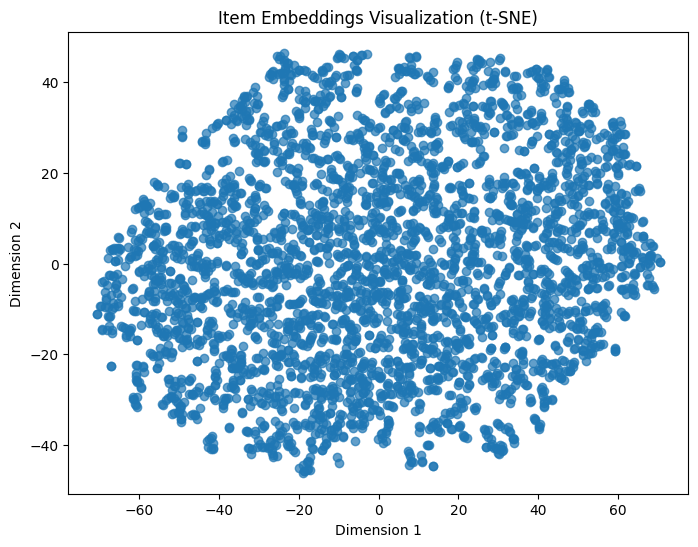

In [143]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce item embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
item_2d = tsne.fit_transform(item_df)

# Plot item embeddings
plt.figure(figsize=(8, 6))
plt.scatter(item_2d[:, 0], item_2d[:, 1], alpha=0.7)
plt.title("Item Embeddings Visualization (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

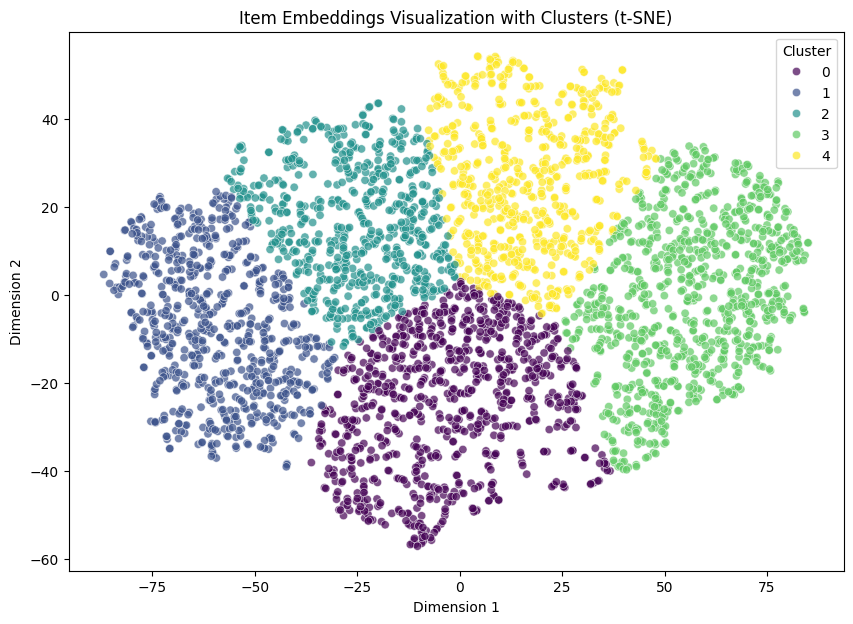

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Reduce item embeddings to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
item_2d = tsne.fit_transform(item_df)

# Perform K-Means clustering (adjust number of clusters if needed)
num_clusters = 5  # Change based on dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(item_2d)

# Convert to DataFrame for visualization
item_2d_df = pd.DataFrame(item_2d, columns=['Dimension 1', 'Dimension 2'])
item_2d_df['Cluster'] = clusters  # Assign cluster labels

# Plot item embeddings with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=item_2d_df["Dimension 1"], y=item_2d_df["Dimension 2"], 
                hue=item_2d_df["Cluster"], palette="viridis", alpha=0.7)

plt.title("Item Embeddings Visualization with Clusters (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Cluster")
plt.show()

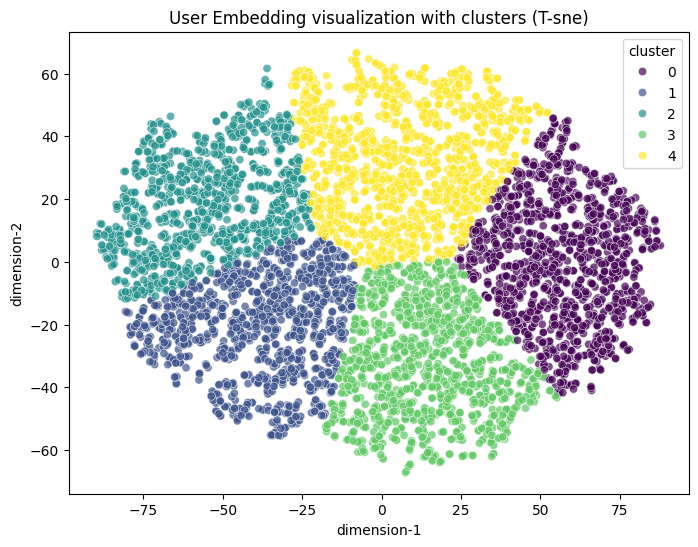

In [145]:
tsne = TSNE(n_components = 2, perplexity = 30, learning_rate = 200 ,random_state = 42)
user_dfs= tsne.fit_transform(user_df)

num_cluster = 5
k_means = KMeans(n_clusters = num_cluster, n_init = 10, random_state = 42)
clusters = k_means.fit_predict(user_dfs)

user_df2 = pd.DataFrame(user_dfs, columns =  ["dim1","dim2"])
user_df2["cluster"] = clusters

plt.figure(figsize = (8,6))
sns.scatterplot(x = user_df2["dim1"], y = user_df2["dim2"] , hue = user_df2["cluster"], palette="viridis", alpha=0.7 )
plt.title("User Embedding visualization with clusters (T-sne)")
plt.xlabel("dimension-1")
plt.ylabel("dimension-2")
plt.show()

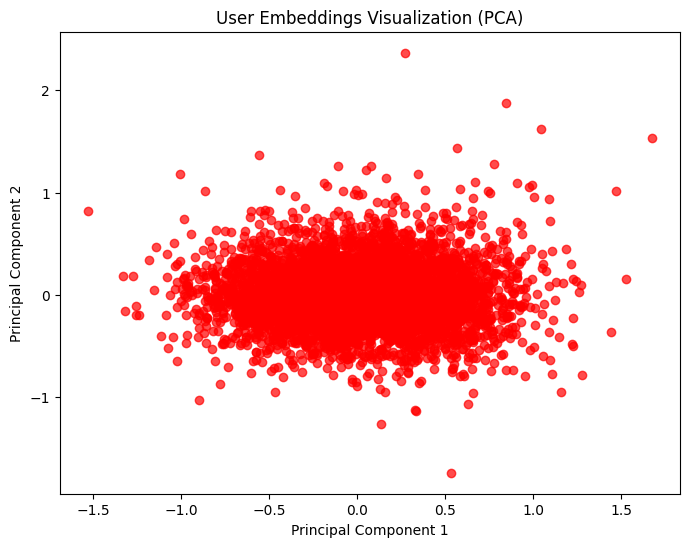

In [146]:
from sklearn.decomposition import PCA

# Reduce user embeddings to 2D
pca = PCA(n_components=2)
user_2d = pca.fit_transform(user_df)

# Plot user embeddings
plt.figure(figsize=(8, 6))
plt.scatter(user_2d[:, 0], user_2d[:, 1], alpha=0.7, color='red')
plt.title("User Embeddings Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()